<a href="https://colab.research.google.com/github/sac-1999/Kaggle-US-Accidents-2016-to-2020/blob/main/US_accidents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#US Accidents (4.2 million records) A Countrywide Traffic Accident Dataset (2016 - 2020)

## Table Of Contents -
1 - About Data


## 1 - About Data
###  Description
This is a countrywide car accident dataset, which covers 49 states of the USA. The accident data are collected from February 2016 to Dec 2020, using two APIs that provide streaming traffic incident (or event) data. These APIs broadcast traffic data captured by a variety of entities, such as the US and state departments of transportation, law enforcement agencies, traffic cameras, and traffic sensors within the road-networks. Currently, there are about 4.2 million accident records in this dataset. 


### Content
This dataset has been collected in real-time, using multiple Traffic APIs. Currently, it contains accident data that are collected from February 2016 to Dec 2020 for the Contiguous United States.

### 2 - List Of Tasks

*   At what time do accidents usually occur in the US. 
*   The state that has the highest number of accidents.
*   Visualize US Accidents Dataset.
*   Factors Affecting Accident Severity
*   Predict the location of the accident
*   banmepls EDA- :Python



### Loading Data

In [1]:
pip install opendatasets

Downloading Datasets from url

In [2]:
import opendatasets as od
url = 'https://www.kaggle.com/sobhanmoosavi/us-accidents'
od.download(url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sachinsachan2021
Your Kaggle Key: ··········


  0%|          | 0.00/299M [00:00<?, ?B/s]

100%|██████████| 299M/299M [00:04<00:00, 65.5MB/s]


In [3]:
data_file_name = '/content/us-accidents/US_Accidents_Dec20.csv'

**Data Preparation and Cleaning**
1. load the file 
2. fix any missing or any incorrect 


In [4]:
import pandas as pd
import numpy as np

df = pd.read_csv(data_file_name)

In [ ]:
df

In [6]:
df.describe()
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_df = df.select_dtypes(include=numerics)

In [ ]:
df.isna().sum()

Percentage of missing values

In [8]:
missing_percent = df.isna().sum().sort_values(ascending = False) / len(df)

In [9]:
missing_percent = missing_percent[missing_percent > 0]

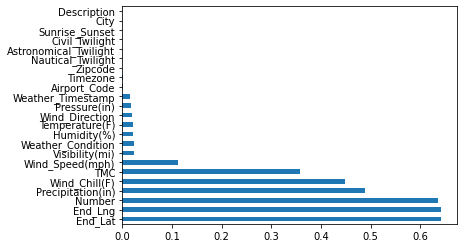

In [110]:
missing_percent.plot(kind = 'barh')

In [ ]:
missing_percent_40 = missing_percent[missing_percent > 0.4]
#missing_percent_40.plot(kind = 'barh')
missing_over_50_colns = list(missing_percent_40.index)
missing_over_50_colns

df[missing_over_50_colns]

Lets Drop those columns which are missing more tha 50 pcent as they will not conclude to full data

Exploratory Analysis
1. City
2. Start Time
3. Start lat , start lng
4. Temp
5. weather condition


why new York is so less with accidents


## 1. At what time do accidents usually occur in the US


#### Task Details
Figure out the time that accidents usually occur in the US. This can be done by using the "start time" and "end time" columns.

In [ ]:
import seaborn as sns
task1_data = df[['Start_Time', 'End_Time']]
task1_data.isnull().sum()
#so there are no missing data in Start Time and End time

In [ ]:
starttime = pd.to_datetime(task1_data.Start_Time).dt.hour
sns.countplot(starttime)

In [ ]:
task1_data['Timestamp'] = (pd.to_datetime(task1_data.End_Time) - pd.to_datetime(task1_data.Start_Time))
task1_data['Total days taken'] = task1_data['Timestamp'].dt.days


In [ ]:
# here we can see there are huge no of days taken to end accident completely so seems like there is issues with end date in data
task1_data[task1_data['Total days taken']>1].index
source_plot = df.iloc[task1_data[task1_data['Total days taken']>1].index,:]['Source']

sns.histplot(source_plot)
task1_data[task1_data['Total days taken']>1]



*   ###### Above it seems like there is something weird with source Bing because total days taken by accident is more than 1 day Hence lets remove above data 


In [ ]:
faulty_end_date_index = list(task1_data[task1_data['Total days taken']>1].index)
task1_data.drop(faulty_end_date_index,axis =0,inplace=True)

In [ ]:
import matplotlib.pyplot as plt
starttime = pd.to_datetime(task1_data.Start_Time).dt.hour
ax = sns.countplot(starttime)
ax.set(xlabel = 'Hour',ylabel='Count of accidents on nth  hour')
sorted_accidents_at_hour = starttime.value_counts().sort_values(ascending = False)
sorted_accidents_at_hour

In [70]:
df.City.unique()

array(['Dayton', 'Reynoldsburg', 'Williamsburg', ..., 'Paron',
       'Clarksdale', 'American Fork-Pleasant Grove'], dtype=object)

In [16]:
cities_by_accident = df.City.value_counts()

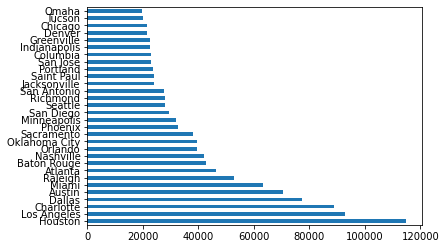

In [17]:
cities_by_accident[:30].plot(kind = 'barh')

In [18]:
import seaborn as sns
sns.set_style('darkgrid')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


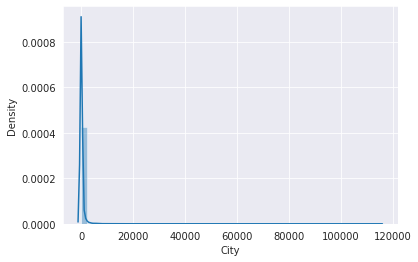

In [19]:
sns.distplot(cities_by_accident)

In [20]:
high_accident_cities = cities_by_accident[cities_by_accident>=1000]
low_accident_cities = cities_by_accident[cities_by_accident<1000]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


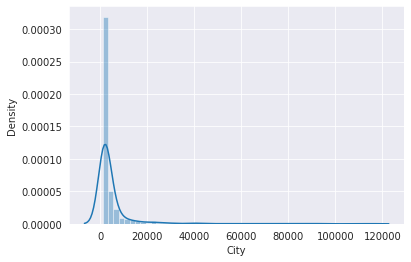

In [21]:
sns.distplot(high_accident_cities)

### Start Time

Insights - 

1. 6th and 7th day accidents are less in compared to other days
2. 5th hour to 10th hour and 15th to 20th favours the most accident
3. 8th to 12th month prones to more accident other wise rate is constant
4. with each year accidents increasing more than linear rate
5. During weekends most accidents occur after 9
6. Additionally looking at the accidents permonth is almost same because there is some missing data in 2016 
7. There is some issue in bing data though mapquest looking good


In [41]:
df.Start_Time
df_time = pd.to_datetime(df.Start_Time)
df_hour = df_time.dt.hour 
df_day = df_time.dt.dayofweek

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


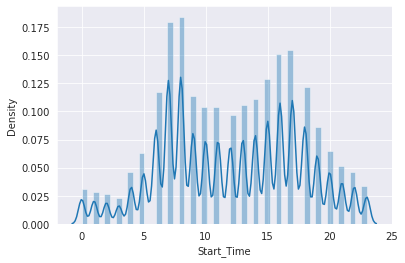

In [38]:
sns.distplot(df_hour)

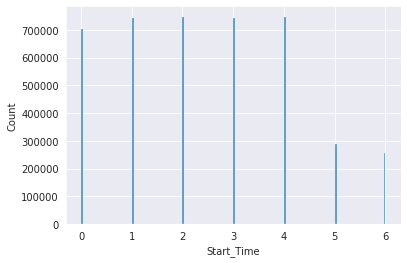

In [56]:
sns.histplot(df_day)

In [57]:
df_month = df_time.dt.month
df_year = df_time.dt.year

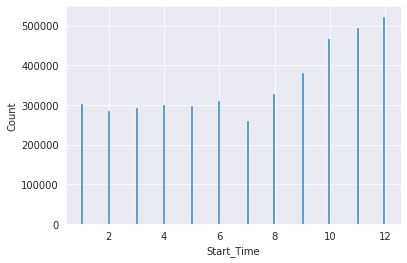

In [55]:
sns.histplot(df_month)

array([2016, 2017, 2020, 2019, 2018])

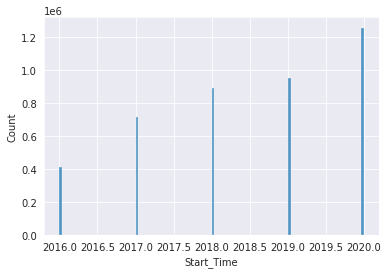

In [60]:
sns.histplot(df_year)
df_year.unique()

Finding the rate of accidents on weekends 
6 - sunday



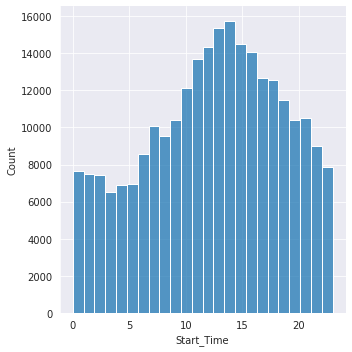

In [71]:
### Saturday accidents per hour
sat_accidents = df_time[df_time.dt.dayofweek == 6]
sns.displot(sat_accidents.dt.hour,bins =24 )

Finding the rate of accidents on weekends 
0 - Monday


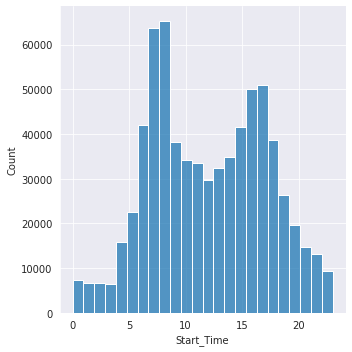

In [70]:
### Monday accidents per hour
sat_accidents = df_time[df_time.dt.dayofweek == 0]
sns.displot(sat_accidents.dt.hour,bins =24 )

## Finding the analysis of accidents per month per year

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


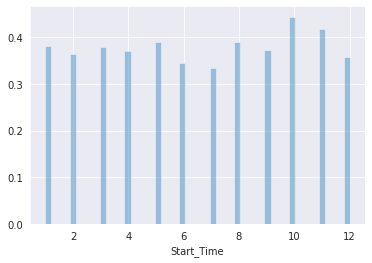

In [77]:
df_2020 = df_time[df_time.dt.year ==2018]
sns.distplot(df_2020.dt.month, kde = False, norm_hist= True)

## Checking for the Bing and Mapquest data

MapQuest         2651861
Bing             1516064
MapQuest-Bing      64616
Name: Source, dtype: int64

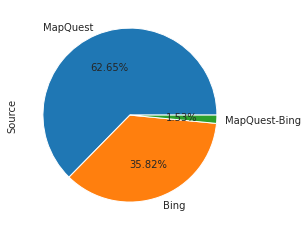

In [83]:
df.Source.value_counts().plot(kind='pie',autopct='%1.2f%%')
df.Source.value_counts()

# Start Lat Discussion

In [84]:
df.Start_Lat

0          39.865147
1          39.928059
2          39.063148
3          39.747753
4          39.627781
             ...    
4232536    34.002480
4232537    32.766960
4232538    33.775450
4232539    33.992460
4232540    34.133930
Name: Start_Lat, Length: 4232541, dtype: float64

In [85]:
df.Start_Lng

0          -84.058723
1          -82.831184
2          -84.032608
3          -84.205582
4          -84.188354
              ...    
4232536   -117.379360
4232537   -117.148060
4232538   -117.847790
4232539   -118.403020
4232540   -117.230920
Name: Start_Lng, Length: 4232541, dtype: float64

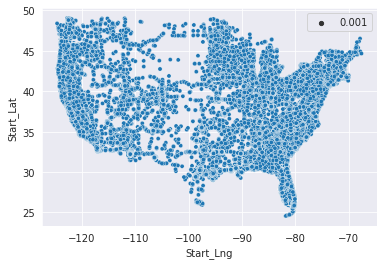

In [99]:
sample_df = df.sample(int(0.1*len(df)))
sns.scatterplot(x=sample_df.Start_Lng , y=sample_df.Start_Lat, size=0.001)

In [133]:
import folium 
sample_df2 = df.sample(100)

locations = sample_df2[['Start_Lat','Start_Lng']]
location_list = locations.values.tolist() 
map =folium.Map(zoom_start=30)

In [134]:
for point in range(0,len(location_list)):
  folium.Marker(location_list[point]).add_to(map)

map

In [135]:
from folium.plugins import HeatMap

In [140]:
map2 = folium.Map(zoom_start=20)
HeatMap(location_list).add_to(map2)

map2

### Consider excuding Bing data seems to have issues

Answer and Questions
1. Among the top 100 cities in no of accidents , which state do they belong

Insights
1. Less than 5 pcent of cities have more than 1000 yearly accidents